In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker, cm
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import os, sys
import netCDF4
import f90nml as f90
import CQL3D_Analysis
#%matplotlib notebook

In [4]:
eqdsk_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/g147634.04525"
# cql3d_nc_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/cql3d.nc"
cql3d_nc_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/test2.nc"
cql3d_krf_nc_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/cql3d_krf001.nc"
cqlin_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cqlinput"

cql_pp = CQL3D_Analysis.CQL3D_Post_Process(
    gen_species_names=["D", "e"],
    cql3d_nc_file=cql3d_nc_file,
    cql3d_krf_file=cql3d_krf_nc_file,
    eqdsk_file=eqdsk_file,
    cql_input_file=cqlin_file,
)

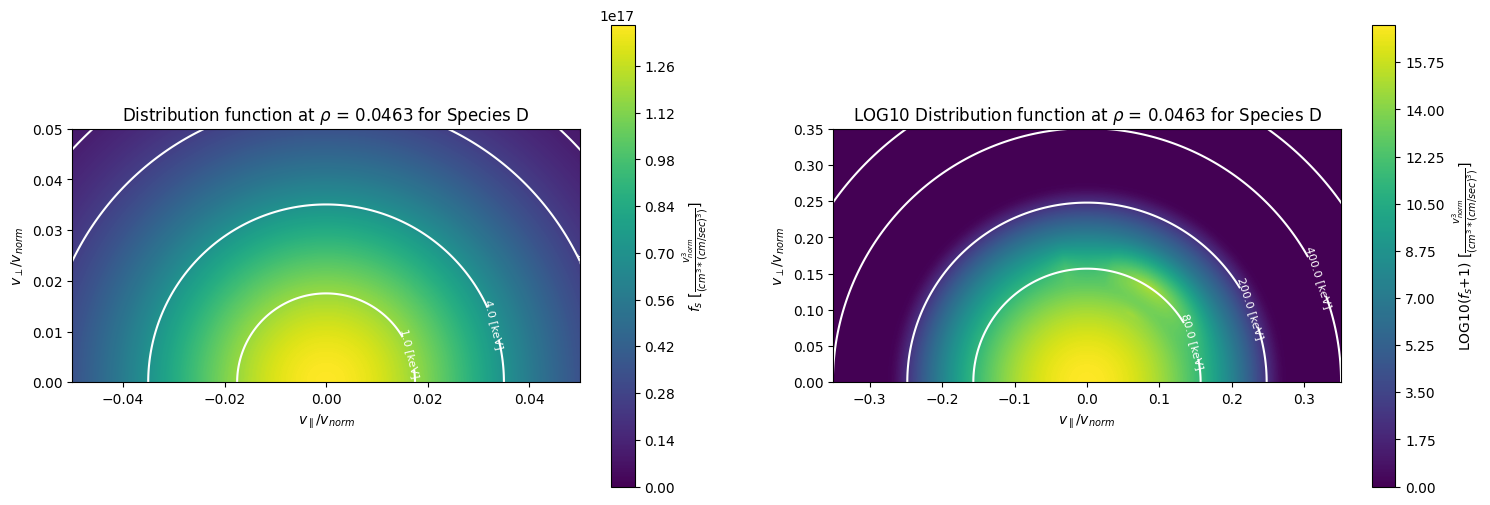

In [7]:
cql_pp.plot_species_distribution_function_at_rho(
    gen_species_index=0,
    rho_index=2,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.05,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    energy_color="white",
)

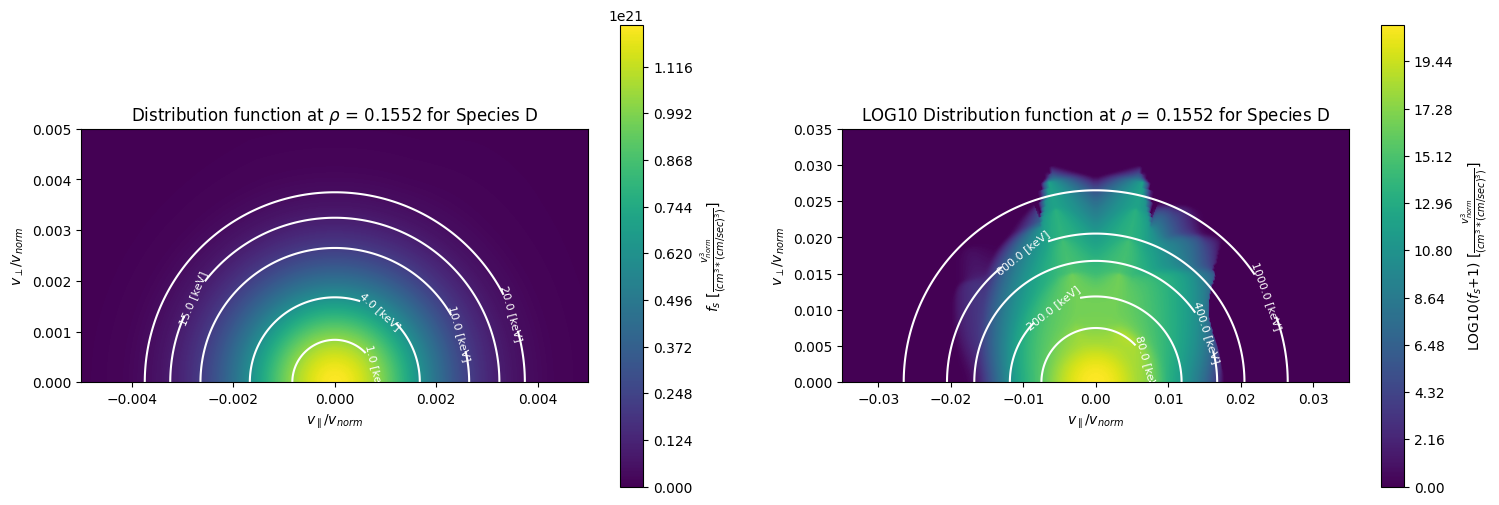

In [4]:
# compare to interpolated near here
cql_pp.plot_species_distribution_function_at_rho(
    gen_species_index=0,
    rho_index=8,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    energy_color="white",
)

In [5]:
#cql_pp.build_species_distribution_function_interpolator_matrix(gen_species_index=0)

0.00 Percent Complete
0.20 Percent Complete
0.40 Percent Complete
0.60 Percent Complete
0.80 Percent Complete
1.00 Percent Complete
1.20 Percent Complete
1.40 Percent Complete
1.60 Percent Complete
1.80 Percent Complete
2.00 Percent Complete
2.20 Percent Complete
2.40 Percent Complete
2.60 Percent Complete
2.80 Percent Complete
3.00 Percent Complete
3.20 Percent Complete
3.40 Percent Complete
3.60 Percent Complete
3.80 Percent Complete
4.00 Percent Complete
4.20 Percent Complete
4.40 Percent Complete
4.60 Percent Complete
4.80 Percent Complete
5.00 Percent Complete
5.20 Percent Complete
5.40 Percent Complete
5.60 Percent Complete
5.80 Percent Complete
6.00 Percent Complete
6.20 Percent Complete
6.40 Percent Complete
6.60 Percent Complete
6.80 Percent Complete
7.00 Percent Complete
7.20 Percent Complete
7.40 Percent Complete
7.60 Percent Complete
7.80 Percent Complete
8.00 Percent Complete
8.20 Percent Complete
8.40 Percent Complete
8.60 Percent Complete
8.80 Percent Complete
9.00 Perce

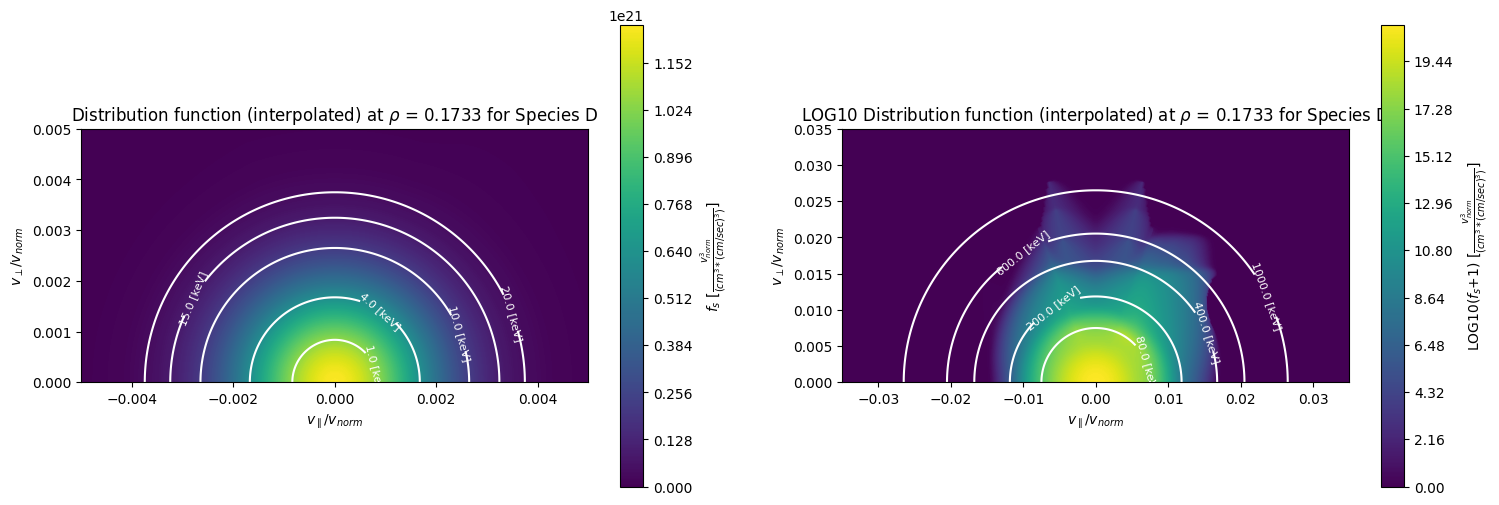

In [5]:
cql_pp.plot_species_distribution_function_at_rho(
    gen_species_index=0,
    rho_index=None,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    energy_color="white",
    use_interpolated_rho=True,
    rho_to_interpolate_to=0.173333
)

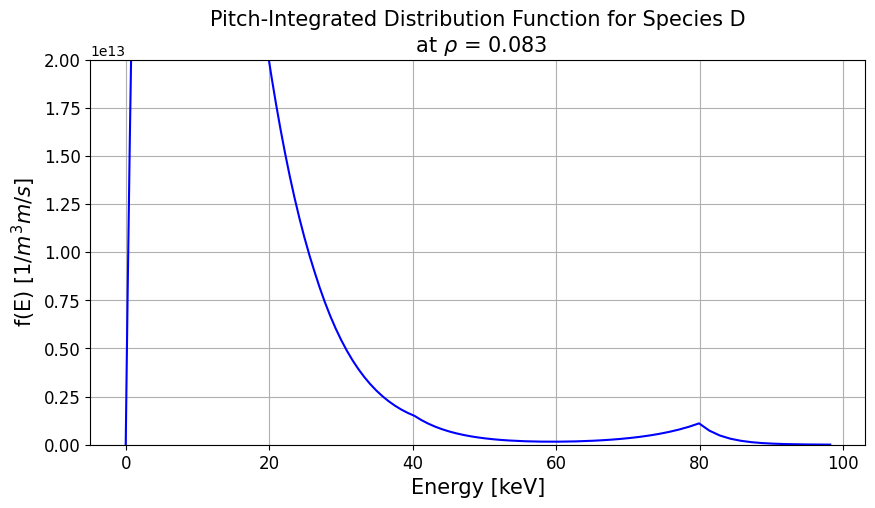

In [8]:
cql_pp.plot_pitch_integrated_distribution_function(
    gen_species_index=0, rho_index=4, Emax_keV=100, ylim=(0, 2e13), figsize=(10, 5)
)

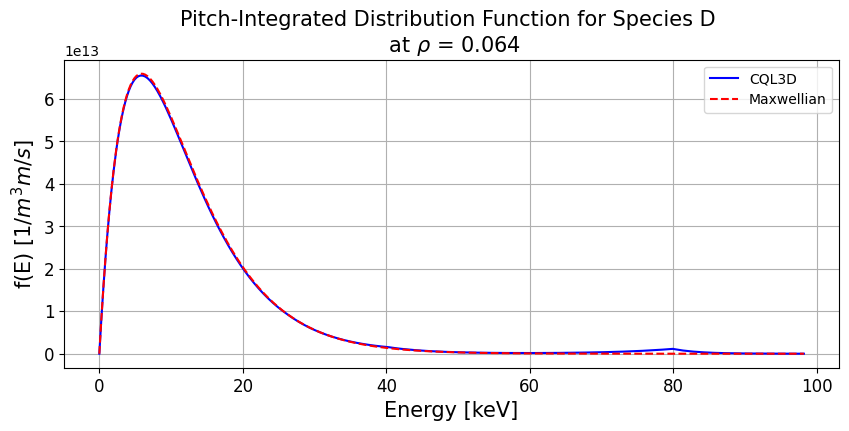

In [9]:
cql_pp.plot_pitch_integrated_distribution_function_versus_maxwellian(
    nmax=5.97e19,
    Tmax=5.89,
    gen_species_index=0,
    rho_index=3,
    Emax_keV=100,
    ylim=None,
    figsize=(10, 4),
    log10=False,
    color="blue",
    maxwell_color="red",
)

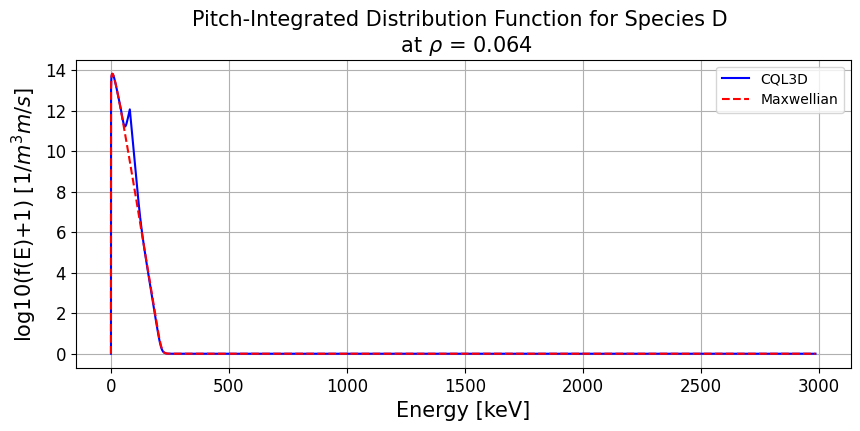

In [10]:
cql_pp.plot_pitch_integrated_distribution_function_versus_maxwellian(
    nmax=5.97e19,
    Tmax=5.89,
    gen_species_index=0,
    rho_index=3,
    Emax_keV=3000,
    ylim=None,
    figsize=(10, 4),
    log10=True,
    color="blue",
    maxwell_color="red",
)

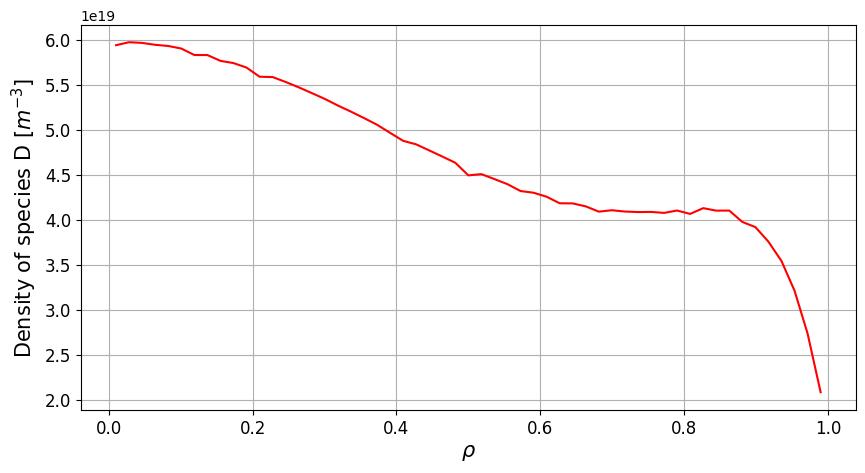

In [9]:
cql_pp.integrate_distribution_function_over_velocity_space(
    gen_species_index=0, rho_index=3
)
cql_pp.plot_density_profile(
    gen_species_index=0, figsize=(10, 5), color="red", return_plot=False
)

161923373.38298452
11.33110858566313


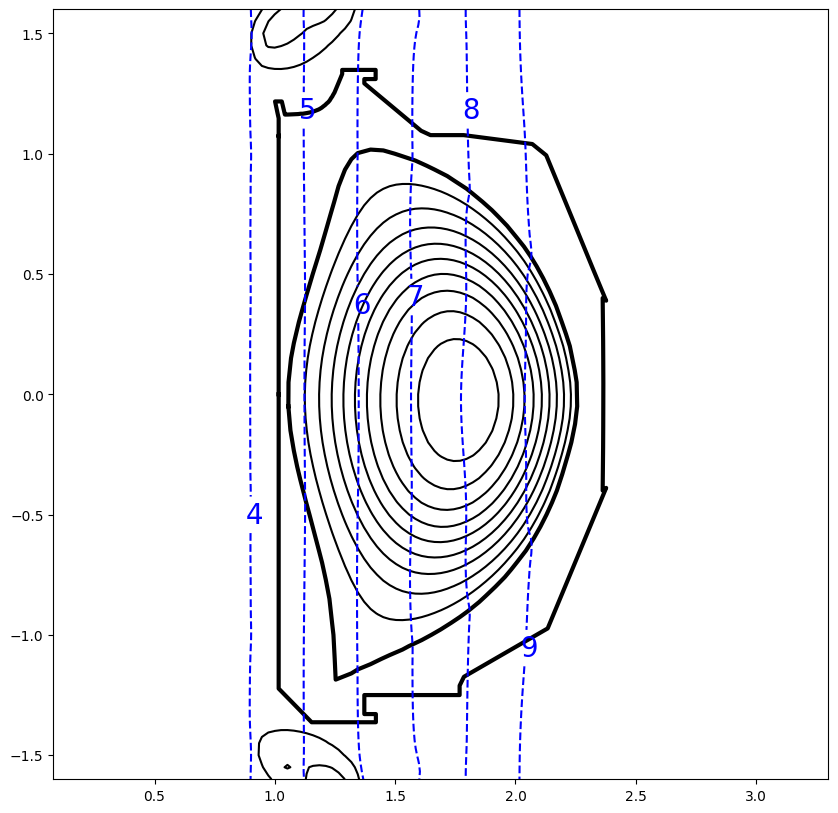

In [10]:
fig, ax = cql_pp.plot_cyclotron_harmonics(
    frequency=96e6,
    harmonics=[4,5,6,7,8,9],
    species_mass=cql_pp.species_mass[0],
    species_charge=cql_pp.species_charges[0],
    r_resolution=100,
    z_resolution=100,
    levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    figsize=(10, 10),
    harmonic_color="blue",
    return_plot=True,
)

plt.savefig('harmonics.png')

1.77750061
-0.0231968987
[[2.17129975e-09]]
0.378125074
0.0011527187210114299


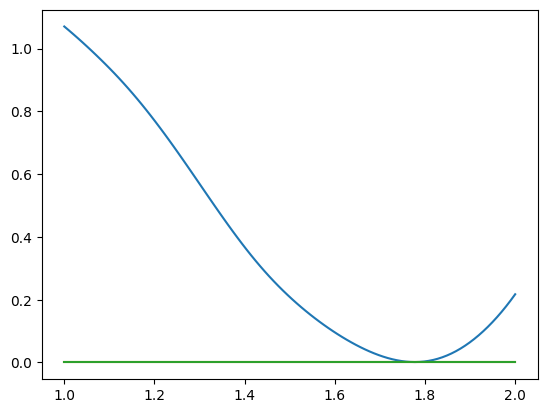

In [11]:
print(cql_pp.eqdsk_with_B_info["rmaxis"])
print(cql_pp.eqdsk_with_B_info["zmaxis"])
print(cql_pp.getpsirzNorm(1.77750061, -0.0231968987))
print(cql_pp.eqdsk_with_B_info["ssimag"])
print(np.min(cql_pp.psirzNorm))
Rv = np.linspace(1, 2, 100)
plt.plot(Rv, cql_pp.getpsirzNorm(Rv, 0.00531968987))
plt.plot(Rv, 0*Rv)
plt.plot(Rv, Rv/Rv * np.min(cql_pp.psirzNorm))

[[2.17129975e-09]]


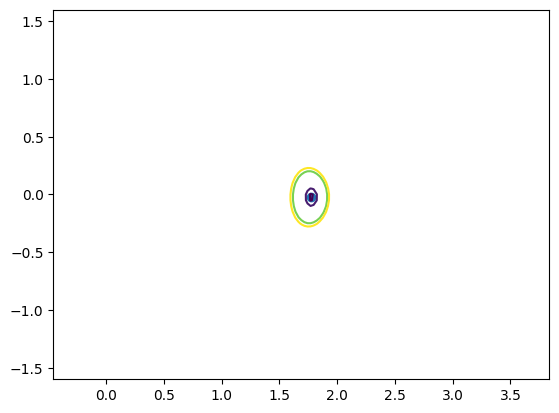

In [12]:
plt.contour(cql_pp.eqdsk_with_B_info["rgrid"], cql_pp.eqdsk_with_B_info["zgrid"], cql_pp.psirzNorm, levels=[0.002, .01, .08, .1])

plt.scatter(cql_pp.eqdsk_with_B_info["rmaxis"], cql_pp.eqdsk_with_B_info["zmaxis"])
plt.axis('equal')
print(cql_pp.getpsirzNorm(cql_pp.eqdsk_with_B_info["rmaxis"], cql_pp.eqdsk_with_B_info["zmaxis"]))
#plt.scatter(cql_pp.eqdsk_with_B_info["rgrid"], cql_pp.eqdsk_with_B_info["zgrid"])

rho:  0.053103523157144825
B_local 1.5951559875135908
B0:  1.5411719749332025
B_ratio: 0.9661575338067504
zeros_counter:  0
max iy_new: 239, pitcheAngle(max_iy_new): 180.0 deg


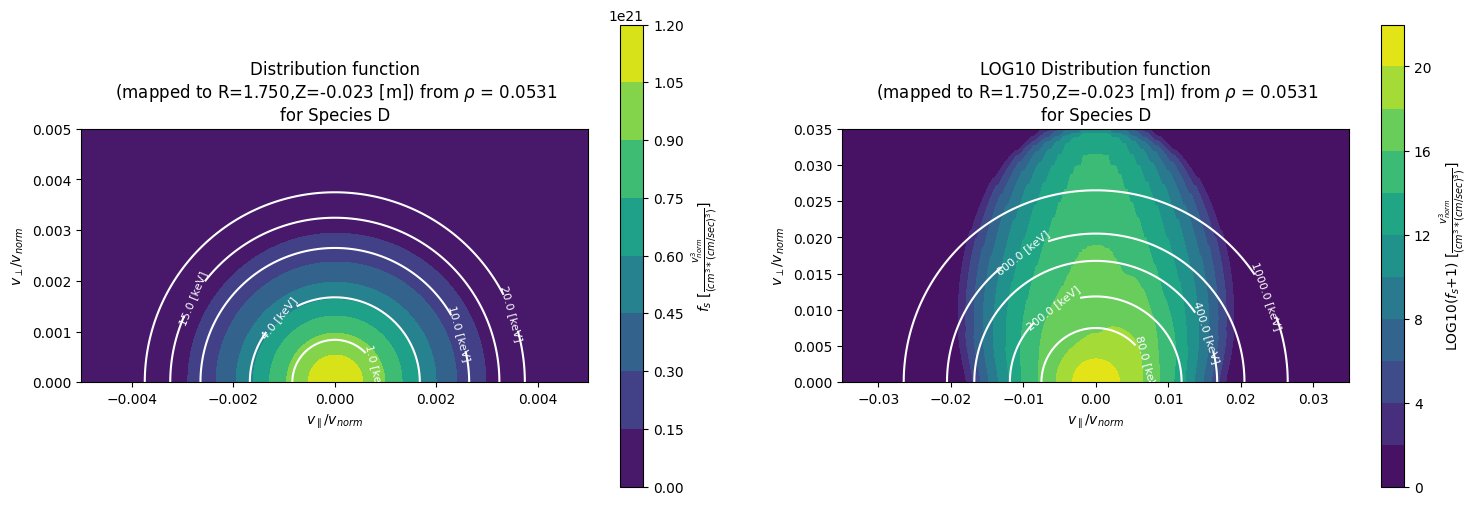

In [13]:
# plot the mapped distribution function
cql_pp.plot_species_distribution_function_at_RZ(
    gen_species_index=0,
    R=1.75,
    Z=-0.0231968987,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    num_f_levels=10,
    energy_color="white",
    )


rho:  0.053103523157144825
B_local 1.5951559875135908
B0:  1.5411719749332025
B_ratio: 0.9661575338067504
zeros_counter:  0
max iy_new: 239, pitcheAngle(max_iy_new): 180.0 deg


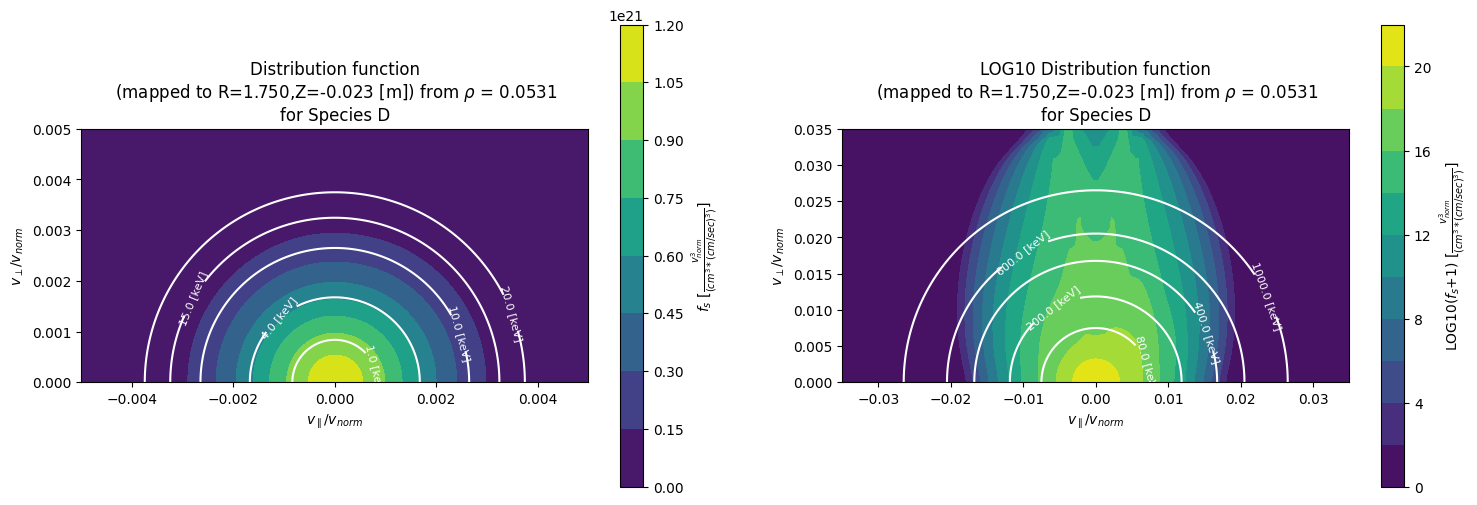

In [14]:
cql_pp.plot_species_distribution_function_at_RZ(
    gen_species_index=0,
    R=1.75,
    Z=-0.0231968987,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    num_f_levels=10,
    energy_color="white",
    plot_f_s_0=True,
    plot_mask=False
    )

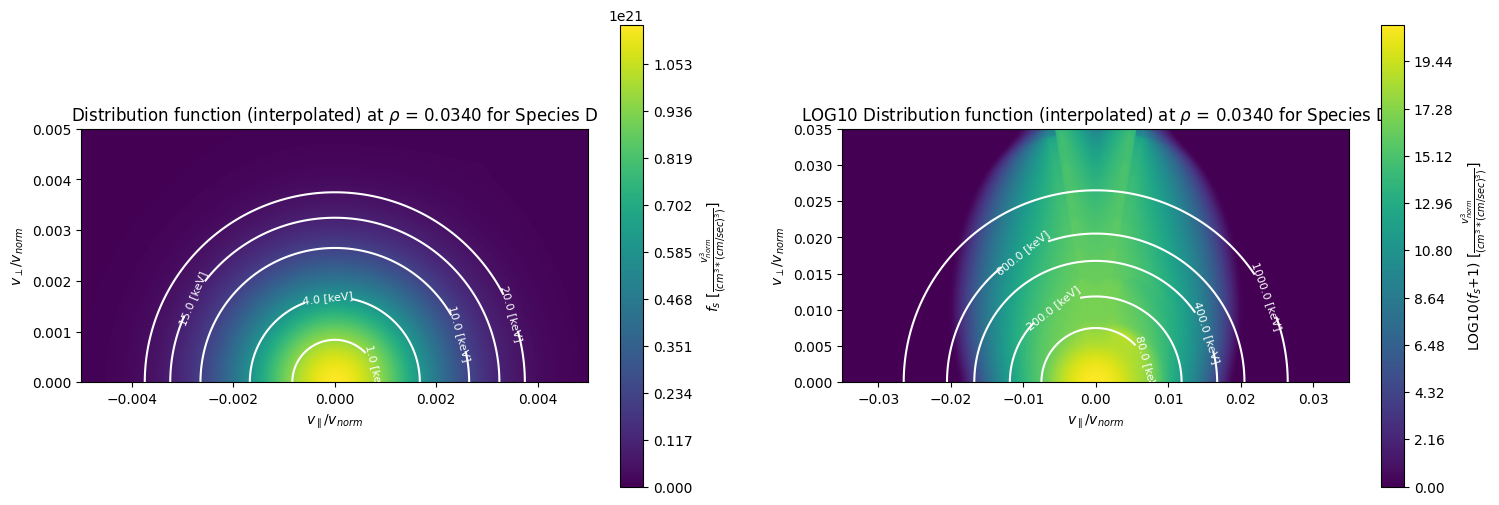

In [15]:
cql_pp.plot_species_distribution_function_at_rho(
    gen_species_index=0,
    rho_index=None,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    energy_color="white",
    use_interpolated_rho=True,
    rho_to_interpolate_to=0.034
)

In [16]:
cql_pp.cql_nc["bnumb"][:].data * 1.6022e19
print(cql_pp.eqdsk.keys())

dict_keys(['nW', 'nH', 'nbbbs', 'limitr', 'rdim', 'zdim', 'rcentr', 'rleft', 'zmid', 'rmaxis', 'zmaxis', 'simag', 'sibry', 'bcentr', 'current', 'fpol', 'pres', 'ffprim', 'pprime', 'psizr', 'qpsi', 'rbbbs', 'zbbbs', 'rlim', 'zlim', 'r', 'z', 'fluxGrid', 'iiInside'])


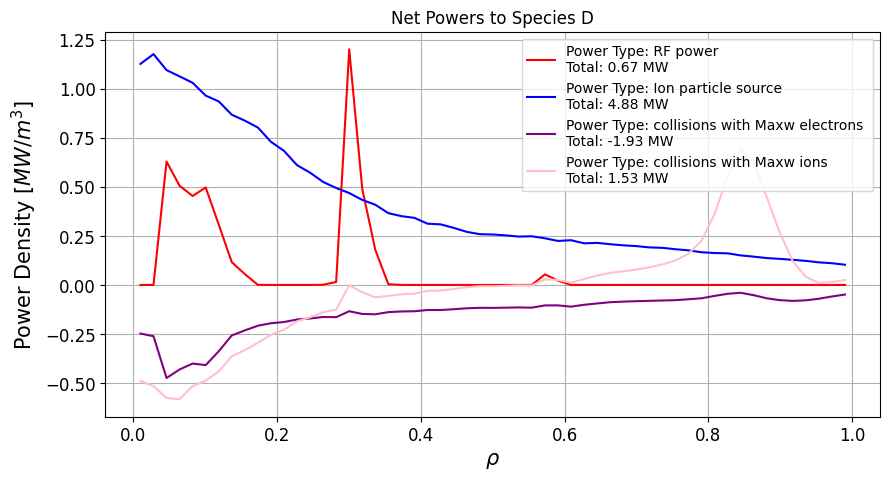

In [17]:
power_types = [
    "RF power",
    "Ion particle source",
    "collisions with Maxw electrons",
    "collisions with Maxw ions",
]
colors = ["red", "blue", "purple", "pink"]

cql_pp.plot_powers_vs_rho(
    gen_species_index=0, power_types=power_types, figsize=(10, 5), colors=colors
)

In [18]:
print((cql_pp.cql_nc["kspeci"][:][1][0][0]).decode("utf-8"))

e


In [19]:
# fg = f90.read("cqlinput_jacob")
# fg = f90.read(cqlin_file)
# fg = f90.read('sam_example_cql_aorsa/cqlinput')

with open(cqlin_file, "r", encoding="latin1") as file:
    cql_nml = f90.read(file)

In [20]:
print(cql_nml["frsetup"]["ebkev"])

[80, 80]


In [ ]:
cql_pp.pitchAngleMesh[0,:].shape[0]

240

In [ ]:
k = [[0]*4]*3
k[0][1] = 4
print(k)
len(k)

[[0, 4, 0, 0], [0, 4, 0, 0], [0, 4, 0, 0]]


3